In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

ds = xr.load_dataset('data/aqm.t06z.ave_1hr_pm25_bc.20240514.227.grib2', engine='cfgrib')
print(ds)

<xarray.Dataset> Size: 459MB
Dimensions:     (step: 72, y: 1025, x: 1473)
Coordinates:
    time        datetime64[ns] 8B 2024-05-14T06:00:00
  * step        (step) timedelta64[ns] 576B 01:00:00 ... 3 days 00:00:00
    sigma       float64 8B 1.0
    latitude    (y, x) float64 12MB 12.19 12.2 12.21 12.23 ... 57.31 57.3 57.29
    longitude   (y, x) float64 12MB 226.5 226.6 226.6 ... 310.5 310.5 310.6
    valid_time  (step) datetime64[ns] 576B 2024-05-14T07:00:00 ... 2024-05-17...
Dimensions without coordinates: y, x
Data variables:
    pmtf        (step, y, x) float32 435MB nan nan nan nan ... 1.924 1.924 1.924
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-11-04T19:07 GRIB to CDM+CF via cfgrib-0.9.1...


In [2]:
da = ds['pmtf'].isel(step=0)
da

<xarray.DataArray 'pmtf' (y: 1025, x: 1473)> Size: 6MB
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [2.577623 , 2.577623 , 2.567623 , ..., 2.9276228, 2.9476228,
        2.9576228],
       [2.587623 , 2.577623 , 2.567623 , ..., 2.9176228, 2.9376228,
        2.9376228],
       [2.6076229, 2.5976229, 2.587623 , ..., 2.8976228, 2.9176228,
        2.9276228]], dtype=float32)
Coordinates:
    time        datetime64[ns] 8B 2024-05-14T06:00:00
    step        timedelta64[ns] 8B 01:00:00
    sigma       float64 8B 1.0
    latitude    (y, x) float64 12MB 12.19 12.2 12.21 12.23 ... 57.31 57.3 57.29
    longitude   (y, x) float64 12MB 226.5 226.6 226.6 ... 310.5 310.5 310.6
    valid_time  datetime64[ns] 8B 2024-05-14T07:00:00
Dimensions without coordinates: y, x
Attributes: (12/34)
    GRIB_paramId:                             260375
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1509825
    GRIB_typeOfLevel:                         sigma
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avg
    ...                                       ...
    GRIB_name:                                Particulate matter (fine)
    GRIB_shortName:                           pmtf
    GRIB_units:                               (10**-6 g) m**-3
    long_name:                                Particulate matter (fine)
    units:                                    (10**-6 g) m**-3
    standard_name:                            unknown

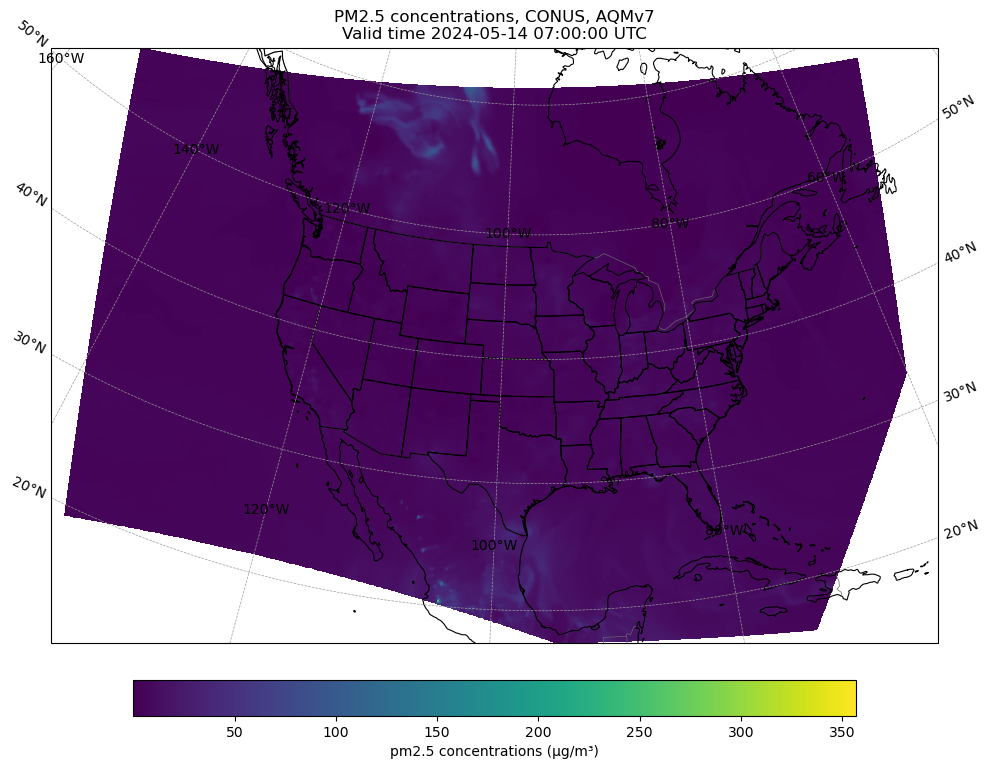

In [3]:
proj_data = ccrs.PlateCarree()
proj_map = ccrs.LambertConformal()

fig = plt.figure(figsize=(10,8))

ax = plt.axes(projection=proj_map)
ax.coastlines(resolution="50m", linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="0.4")
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)
ax.gridlines(draw_labels=True, linewidth=0.5, color="0.6", linestyle="--")

pcm = ax.pcolormesh(
    da['longitude'], da['latitude'], da,
    transform=proj_data,
)

cb = fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.05, fraction=0.05)
cb.set_label('pm2.5 concentrations (µg/m³)')

valid = pd.to_datetime((da.time + da.step).item(), unit='ns')
ax.set_title(
    f'PM2.5 concentrations, CONUS, AQMv7\n'
    f'Valid time {valid} UTC'
)

plt.tight_layout()
plt.show()

Subregion + reproject + limit max PM2.5 to be 20 for visualization

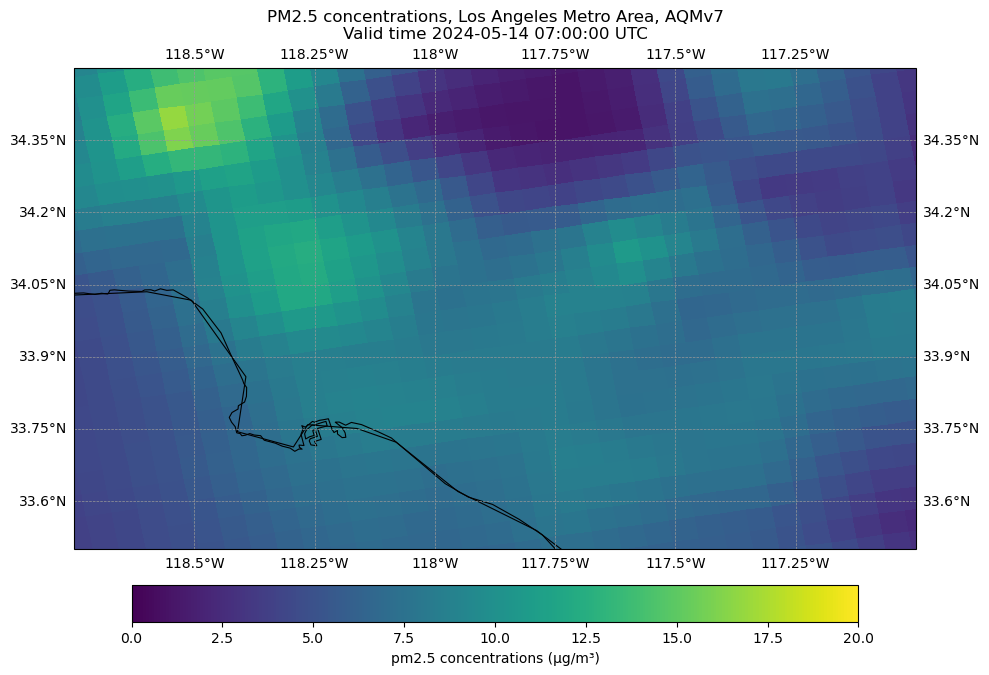

In [4]:
lat_bottom, lat_top = 33.5, 34.5
lon_bottom, lon_top = -118.75, -117.0
la_extent = (lon_bottom, lon_top, lat_bottom, lat_top)

fig = plt.figure(figsize=(10,8))

ax = plt.axes(projection=proj_data)
ax.coastlines(resolution="50m", linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="0.4")
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)
ax.gridlines(draw_labels=True, linewidth=0.5, color="0.6", linestyle="--")
ax.set_extent(la_extent, crs=proj_data)

pcm = ax.pcolormesh(
    da['longitude'], da['latitude'], da,
    transform=proj_data,
    vmin=0, vmax=20
)

cb = fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.05, fraction=0.05)
cb.set_label('pm2.5 concentrations (µg/m³)')

valid = pd.to_datetime((da.time + da.step).item(), unit='ns')
ax.set_title(
    f'PM2.5 concentrations, Los Angeles Metro Area, AQMv7\n'
    f'Valid time {valid} UTC'
)

plt.tight_layout()
plt.show()